# SVM Model – Sampling Comparison

In [1]:

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from models.train_svm import run
from models.utils import load_dataframe, split_features


In [2]:

MODEL = 'svm'
SAMPLINGS = ['none', 'under', 'smote']


In [3]:

results = {}
for samp in SAMPLINGS:
    print('Running sampling:', samp)
    results[samp] = run(samp)


Running sampling: none
Best params: {'clf__C': 0.5, 'clf__gamma': 0.01}
[SVM[none]] precision=0.0000 recall=0.0000 auc=0.4483
Confusion Matrix:
 [[2219    0]
 [  21    0]]
Running sampling: under
Best params: {'clf__C': 0.5, 'clf__gamma': 0.01}
[SVM[under]] precision=0.0087 recall=0.4286 auc=0.5070
Confusion Matrix:
 [[1188 1031]
 [  12    9]]
Running sampling: smote
Best params: {'clf__C': 0.5, 'clf__gamma': 'scale'}
[SVM[smote]] precision=1.0000 recall=0.0952 auc=0.4491
Confusion Matrix:
 [[2219    0]
 [  19    2]]


In [4]:

metrics_df = pd.DataFrame(
    [{'sampling': samp, **metrics} for samp, metrics in results.items()]
)
metrics_df[['sampling', 'precision', 'recall', 'roc_auc']]


,sampling,precision,recall,roc_auc
0,none,0.000000,0.000000,0.448293
1,under,0.008654,0.428571,0.507028
2,smote,1.000000,0.095238,0.449130


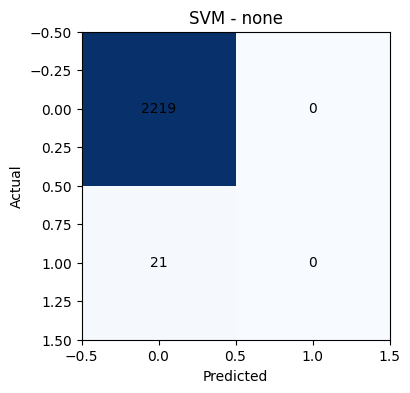

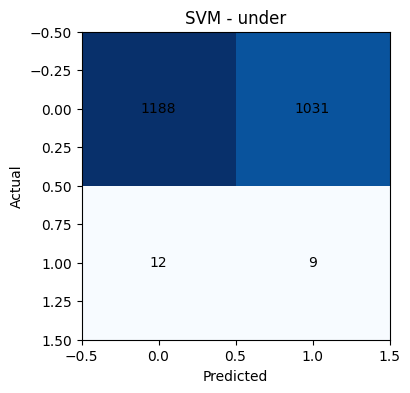

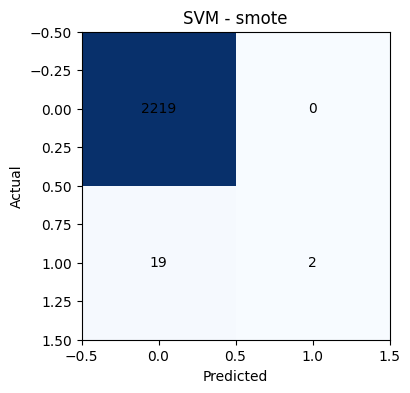

In [5]:

for samp, metrics in results.items():
    cm = metrics['confusion_matrix']
    plt.figure(figsize=(4, 4))
    plt.imshow(cm, cmap='Blues')
    plt.title(f"{MODEL.upper()} - {samp}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i][j], ha='center', va='center', color='black')
    plt.show()
